In [44]:
# Importing librarites
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # numerical calculation, linear algebra
import plotly.express as px # visilizing plot
import matplotlib.pyplot as plt # visulizing plot
import seaborn as sns # visilizing plot
from scipy.stats import chi2_contingency, norm # Calculate chi2

# DESCRIPTION

This dataset contains **180519** observations for a Supply Chain by Dataco Global Company. Each observation represents a order between the ***1st of January 2015*** to ***31st of January 2018***.

In [45]:
# Display all columns from a dataframe
pd.set_option("display.max_columns", None)

In [46]:
# Loading the data
df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding="latin1")

In [47]:
# Showing first 5 rows in dataframe, we can set df.head(number_of_rows) where as number_of_rows for how many rows we want to see
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


***Observations:*** It provides the first five rows of the dataset

In [48]:
# Showing last 5 rows in dataframe, we can set df.tail(number_of_rows) where as number_of_rows for how many rows we want to see
df.tail()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.0,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,9141,Clark,XXXXXXXXX,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,9141,1/16/2016 1:34,26037,1004,4.0,0.01,65161,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,EE. UU.,XXXXXXXXX,John,291,Smith,XXXXXXXXX,Corporate,CT,97 Burning Landing,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,291,1/15/2016 21:00,26024,1004,8.0,0.02,65129,399.980011,0.36,1,399.980011,391.980011,141.110001,Oceania,Australia del Sur,PENDING,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,2813,Smith,XXXXXXXXX,Consumer,PR,2585 Silent Autumn Landing,725.0,7,Fan Shop,18.213350,-66.370575,Pacific Asia,Adelaide,Australia,2813,1/15/2016 20:18,26022,1004,12.0,0.03,65126,399.980011,0.48,1,399.980011,387.980011,186.229996,Oceania,Australia del Sur,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class
180518,PAYMENT,4,4,168.949997,383.980011,Shipping on time,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Andrea,7547,Ortega,XXXXXXXXX,Consumer,PR,697 Little Meadow,725.0,7,Fan Shop,18.290380,-66.370613,Pacific Asia,Nagercoil,India,7547,1/15/2016 18:54,26018,1004,16.0,0.04,65113,399.980011,0.44,1,399.980011,383.980011,168.949997,South Asia,Tamil Nadu,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 18:54,Standard Class


***Observations:*** It provides the last five rows of the dataset

In [49]:
print(df.shape)

(180519, 53)


***Observations:*** We can see that the table contains ***180519*** rows and ***53*** columns.

In [50]:
# Check the columns name in DataFrame
print(df.columns)

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

#### We can use the ***info()*** method to output some general information about the dataframe:

In [51]:
# Check the data information like which type of data the column contains
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

# *Data Cleaning*

***Observations:*** From the output of ***info*** we can see that ***shipping date (DateOrders)*** and ***order date (DateOrders)*** is showing ***object*** data type. It should be ***datetime*** data type. So, Let's make it

In [52]:
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'], format='%m/%d/%Y %H:%M')
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], format='%m/%d/%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

***Observations:*** Now ***shipping date (DateOrders)*** and ***order date (DateOrders)*** columns are showing correct data type.

In [53]:
# UDF for getting duplicate columns name
def getDuplicateColumns(df):
    duplicateColumnNames = set() # Define empty set
     
    for x in range(df.shape[1]): # Iterate through all the columns of DataFrame
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]): #Iterate through all the columns in DataFrame from (x + 1)th index to last index
            otherCol = df.iloc[:, y]
             
            # If two columns are equal then adding to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                 
    # Return list of unique column names whose contents are duplicates
    return list(duplicateColumnNames)

columns = getDuplicateColumns(df)
print(columns)
print("\nTotal duplicate columns: ", len(columns))

['Order Customer Id', 'Order Item Total', 'Order Profit Per Order', 'Product Price', 'Product Category Id', 'Customer Password', 'Product Card Id']

Total duplicate columns:  7


These columns are duplicate, So we can drop these colums. Let's drop those

In [54]:
df = df.drop(columns = getDuplicateColumns(df), inplace=False)
print(df.shape)

(180519, 46)


Earlier there was 53 columns, After removing ***7*** duplicate columns, Now it have 46 columns

In [55]:
# UDF for getting duplicate columns name
def getOneDistinctValueCols(df):
    duplicateColumnNames = set() # Define empty set
    uniqueColumnNames = {}
    
    for col in list(df.columns): # Iterate through all the columns of DataFrame
        listUniqueValue = df[col].unique()
        if (len(listUniqueValue) == 1): # If column contains only signle unqiue value then adding to the dictionary
            uniqueColumnNames[col] = listUniqueValue[0];
    
    # Return dict of signle unique column names along with values.
    return dict(uniqueColumnNames)

columns = getOneDistinctValueCols(df)
print(columns)
print("\nTotal columns: ", len(columns))

{'Customer Email': 'XXXXXXXXX', 'Product Description': nan, 'Product Status': 0}

Total columns:  3


From the above result we can see that ***3*** columns contains only one unique values. So, we can drop those columns. Let's do it

In [56]:
df = df.drop(columns = getOneDistinctValueCols(df).keys(), inplace=False)
print(df.shape)

(180519, 43)


Earlier there was 53 columns, After removing ***3*** duplicate columns, Now it have 43 columns

In [57]:
# Merge customer first name & last name in single column 
df["Customer Name"] = df["Customer Fname"].astype(str) + " " + df["Customer Lname"].astype(str)

In [58]:
try:
    # Drop Customer Fname & Customer Lname columns
    df.drop(columns = ["Customer Fname", "Customer Lname"], inplace=True)
except:
    pass
print(df.shape)

(180519, 42)


### Now let's check whether there have any null values or not

In [59]:
print(df.isnull().sum())

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Id                           0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0
Order City                            0
Order Country                         0
order date (DateOrders)               0
Order Id                              0


***Observations:*** There are 3 missing values in **Customer Zipcode** column. Since the missing values are just zip codes which are not very important these are replaced with zero before proceeding with data analysis

From the result, We can see there is ***Order Zipcode*** column contains null value. And if we think about this column it is irrelevant in data analysis. So, we can drop this column as well. 

In [60]:
df["Customer Zipcode"] = df["Customer Zipcode"].fillna(0) # Filling NaN columns with zero

In [61]:
try:
    df.drop(columns = [
        "Order Zipcode",
        "Product Image",
        "Latitude",
        "Longitude"
    ], inplace=True)
except:
    pass
print(df.isnull().sum())

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ra

***Observations:*** Now, we can see there is ***no null values*** in the above columns

# Statistical analysis of numeric columns

In [62]:
# Check the statistical data of numeric columns
df_s = df.copy()
df_s = df_s.loc[:, ~df_s.columns.isin(["Category Id", "Customer Id", "Department Id", "Order Id", "Order Item Cardprod Id", "Order Item Id"])] # Exclude columns which are not necessary in statistical analysis
df_s.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Customer Zipcode,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,21.974989,183.107609,0.548291,35920.529950,20.664741,0.101668,141.232550,0.120647,2.127638,203.772096
std,1.623722,1.374449,104.433526,120.043670,0.497664,37542.434755,21.800901,0.070415,139.732492,0.466796,1.453451,132.273077
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,0.000000,0.000000,0.000000,9.990000,-2.750000,1.000000,9.990000
25%,2.000000,2.000000,7.000000,104.379997,0.000000,725.000000,5.400000,0.040000,50.000000,0.080000,1.000000,119.980003
50%,3.000000,4.000000,31.520000,163.990005,1.000000,19380.000000,14.000000,0.100000,59.990002,0.270000,1.000000,199.919998
75%,5.000000,4.000000,64.800003,247.399994,1.000000,78207.000000,29.990000,0.160000,199.990005,0.360000,3.000000,299.950012
max,6.000000,4.000000,911.799988,1939.989990,1.000000,99205.000000,500.000000,0.250000,1999.989990,0.500000,5.000000,1999.989990


***Observations***
- Maximum late delivery is 2 days (shipment schedule max - shipping read max)
- Maximum schedules shiiping day is 4 and min 0 day
- Maximum sales is ~2000 and minimum sales is ~10
- Maximum sales per customer is ~1940 and minimum sales per customer is ~8 and average sales per customer is ~183 etc

# Univarite Analysis

##  Show relationships between two variables

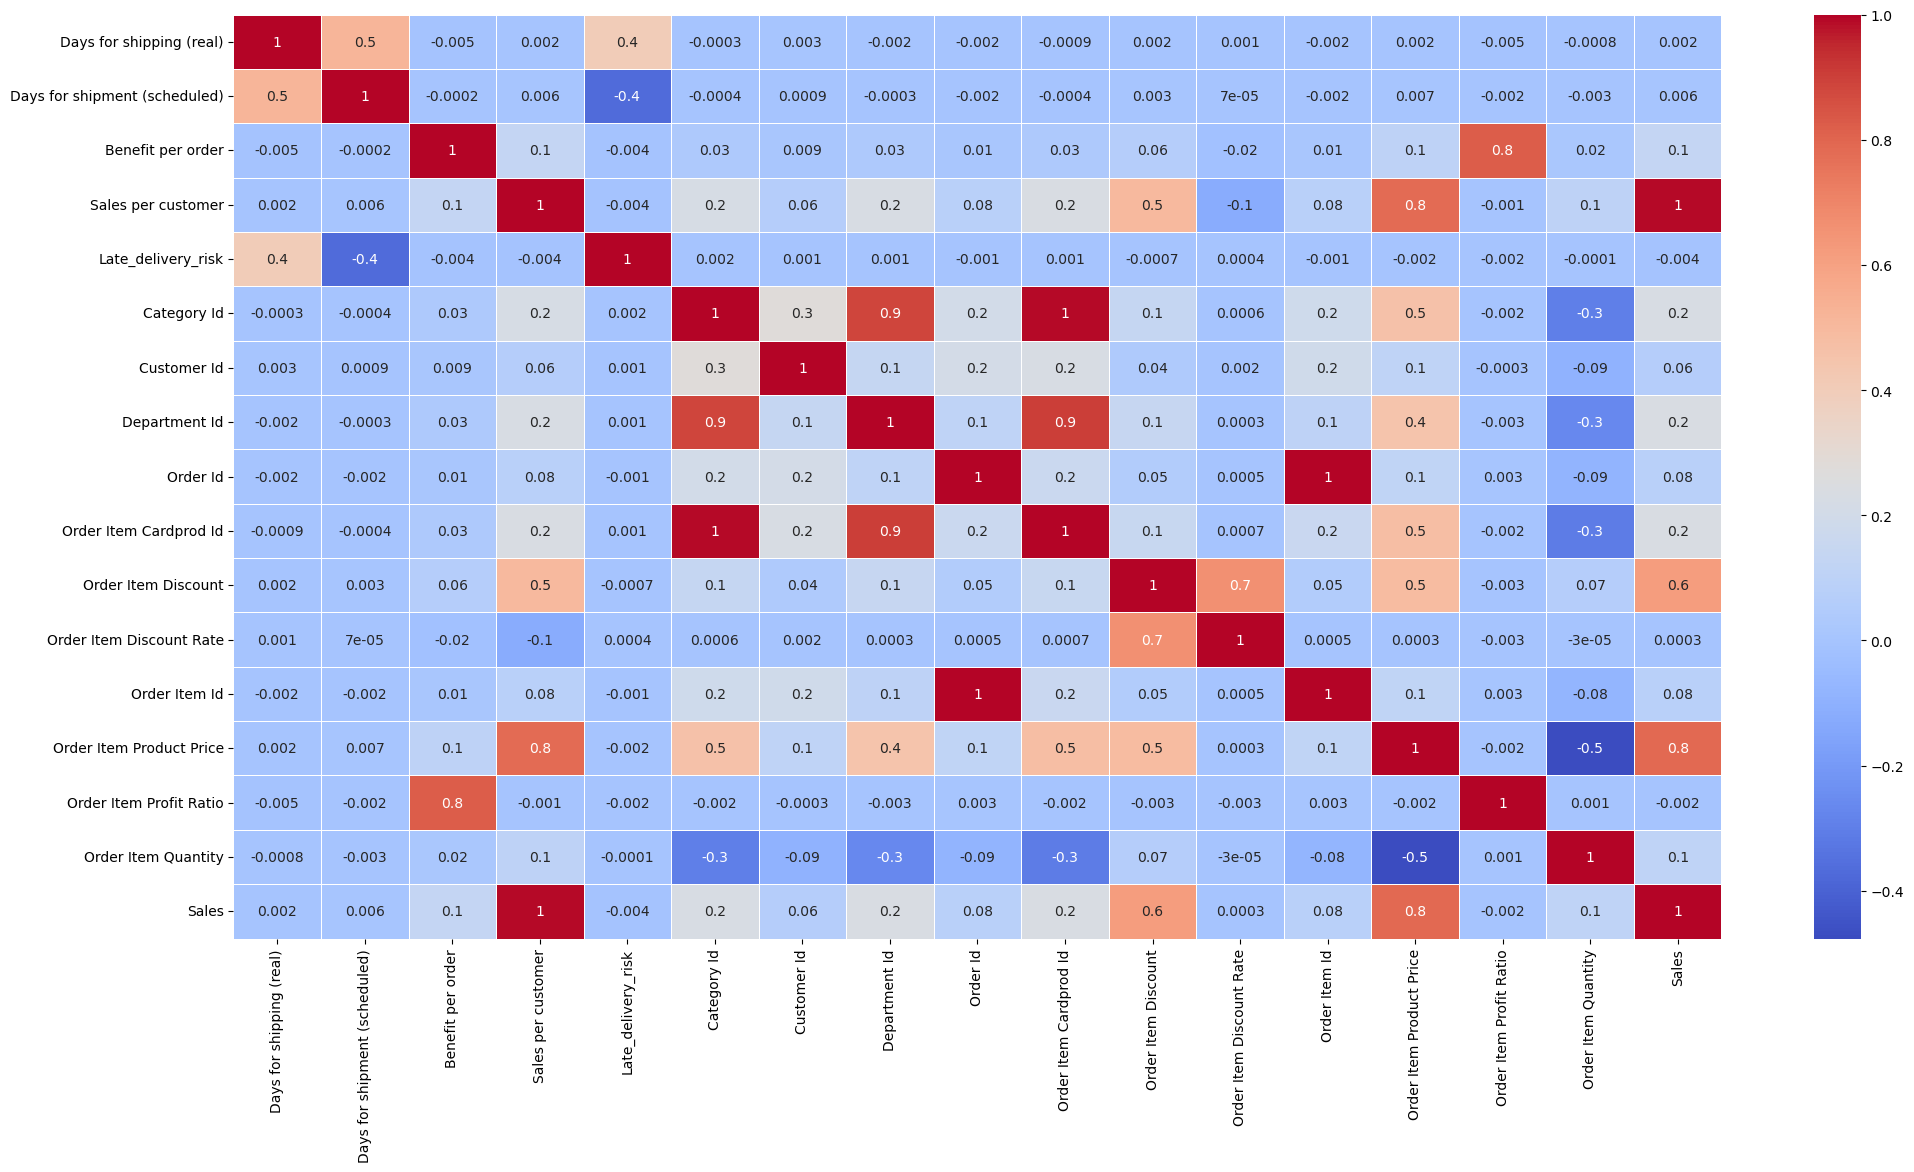

In [36]:
# HeatMap - How one variable is moving with respect ot another variable
fig, ax = plt.subplots(figsize=(24,12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt=".1g", cmap="coolwarm") 
plt.show()

**Observations: *Highly correlation***
- Sales per customer & Sales
- Category id & Department id
- Category id & Order item cardprod id
- Department id & Category id
- Department id & Order item cartprod id

The data being used for analysis is related to the supply chain, so it makes sense to find out which region has the most sales? This can be found using the groupby method which will group together similar market regions and add up all the sales for that particular region using the 'sum' function.

## Which markets has most sales?

<AxesSubplot:title={'center':'Total sales for all markets'}, xlabel='Market'>

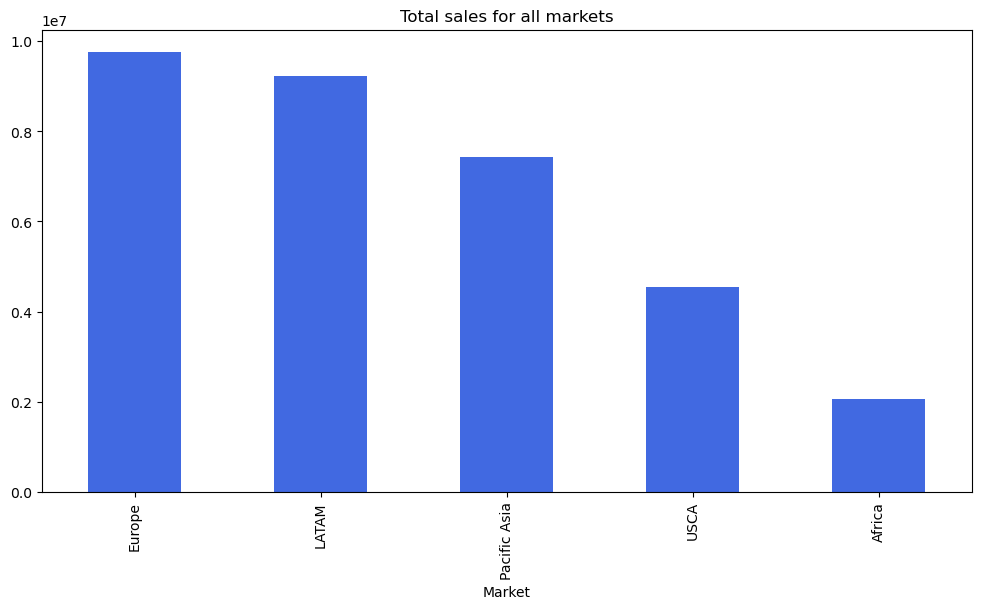

In [89]:
market = df.groupby("Market") #Grouping by market
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets", color="royalblue")

***Observations:*** Maximum items sales in **European** market and **African** market is least

## Which region has most sales?

<AxesSubplot:title={'center':'Total sales for all regions'}, xlabel='Order Region'>

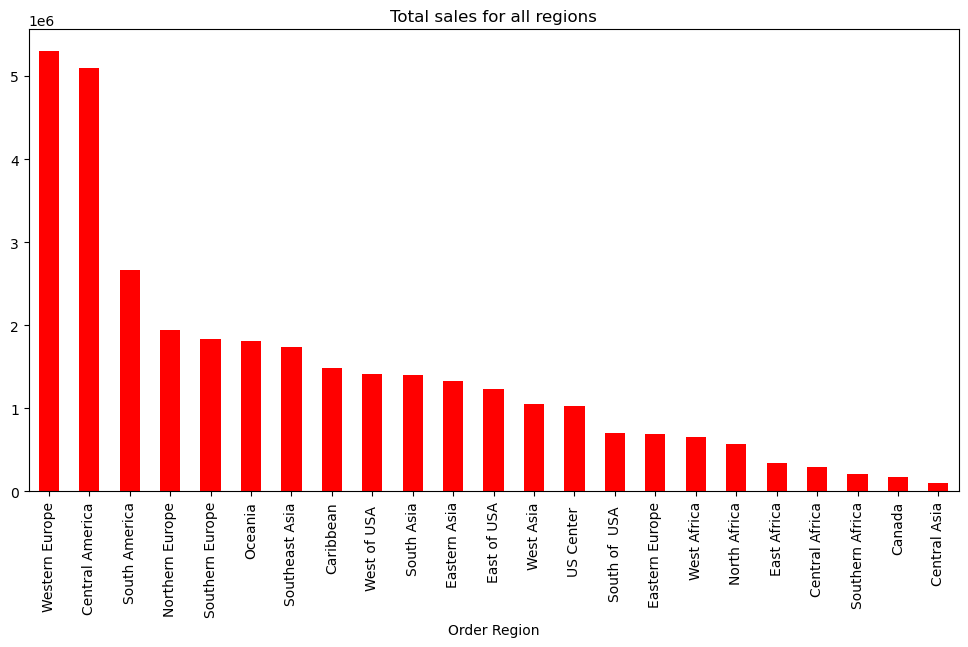

In [84]:
region = df.groupby("Order Region") # Grouping by Region
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions", color="red")

***Observations:*** Maximum Items sales is **Western Europe** region & minimum items sales in **Central Asia** region

## Which country has made heighest orders?

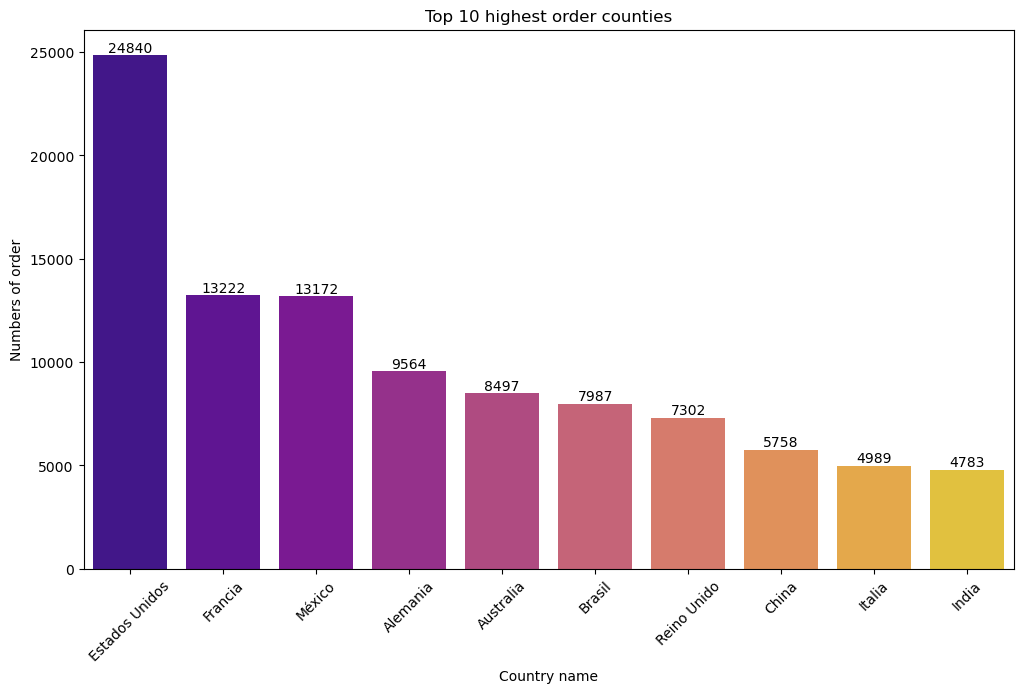

In [101]:
# Count Plot
plt.figure(figsize=(12,7))
ax = sns.countplot(data=df, x="Order Country", order=pd.value_counts(df["Order Country"]).iloc[:10].index, palette="plasma")
plt.title("Top 10 highest order counties")
plt.xlabel("Country name")
plt.ylabel("Numbers of order")

for container in ax.containers:
    ax.bar_label(container) # showing values on countplot bar
    
plt.xticks(rotation=45)
plt.show()

**Observation**: From the above graph, we can observe that people from ***Estados Unidos*** country have height number of order

## Which category of products has highest sales?
The same procedure can be followed here to see the product category with highest sales

<AxesSubplot:title={'center':'Average price'}, xlabel='Category Name'>

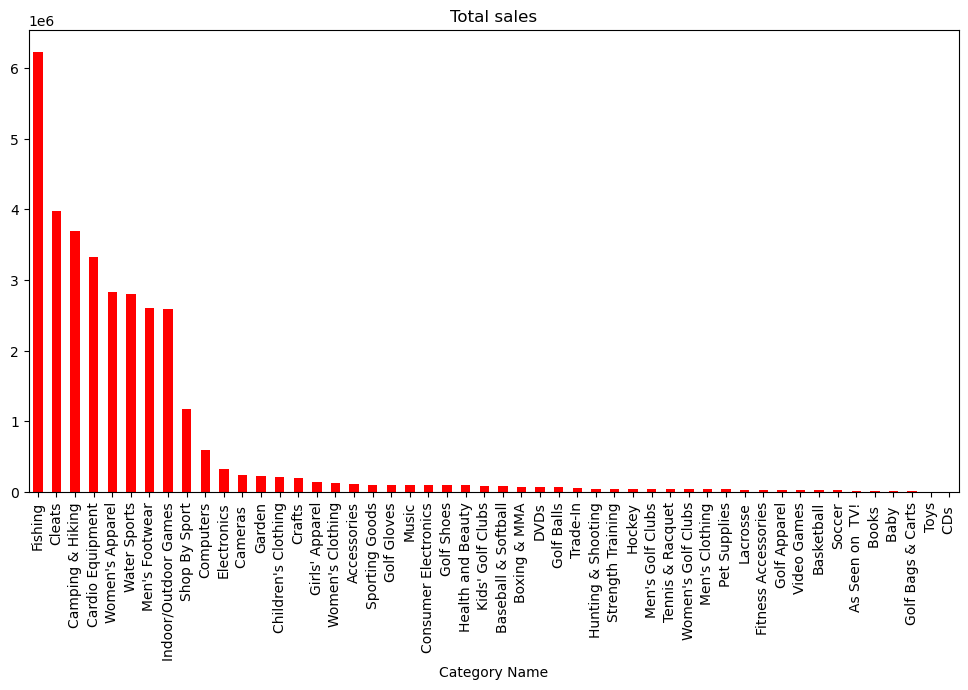

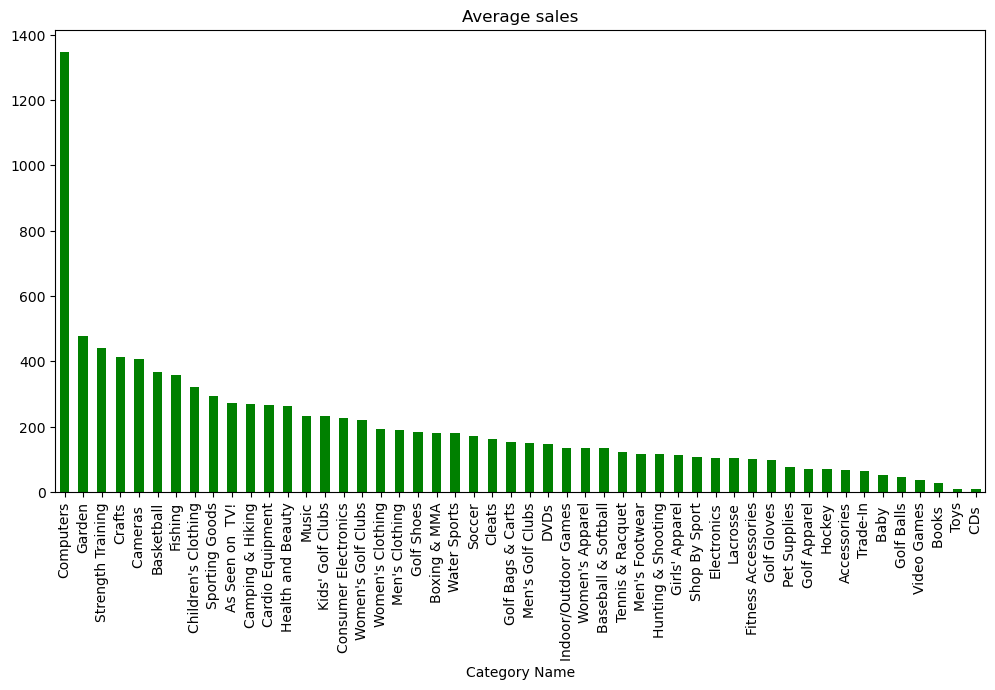

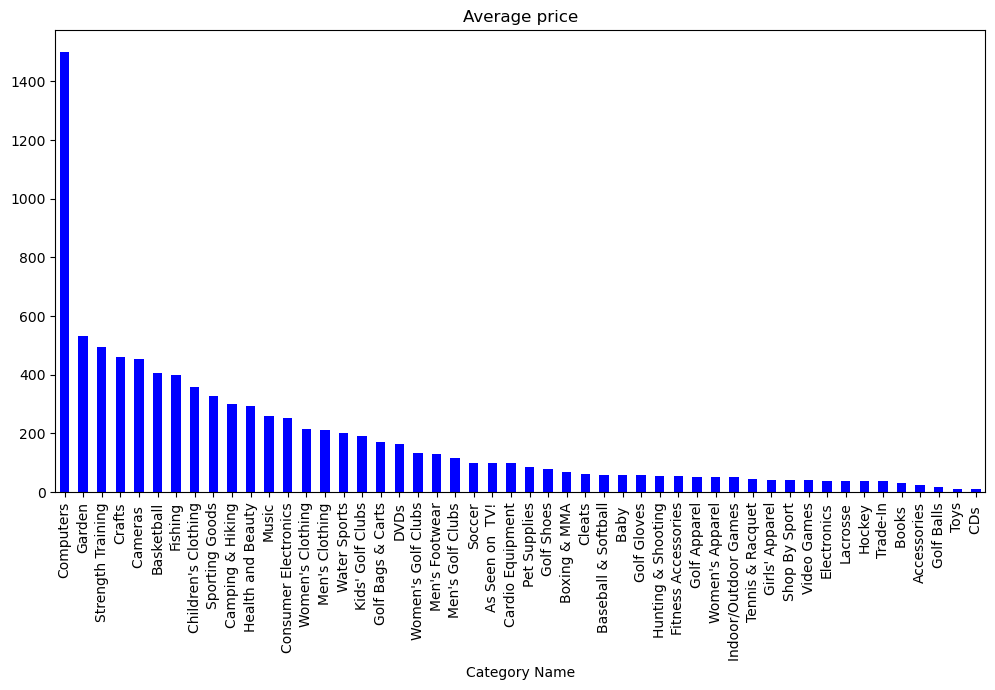

In [107]:
categories = df.groupby('Category Name') # Grouping by categories

plt.figure(1)
# Total sum of sales for all categories
categories['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales", color="red")

# Mean sales for all categories
plt.figure(2)
categories['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average sales", color="green")

plt.figure(3)
# Mean prices for all categories
categories['Order Item Product Price'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average price", color="blue")

***Observations:*** As we can see from Figure-1 that fishing category had the highest number of sales followed by Cleats. However it is suprising to see that top 8 products with highest price on average are the most sold products on average with computers having almost 1350 sales despite price being 1500$

## Order Number respect to Delivery Status

In [338]:
# Let's check Order Number respect to Delivery Status
delivery_status_count = df.groupby(["Delivery Status"]).size().reset_index(name="Numbers of Order").sort_values(by="Numbers of Order", ascending=False)
delivery_status_count

,Delivery Status,Numbers of Order
1,Late delivery,98977
0,Advance shipping,41592
3,Shipping on time,32196
2,Shipping canceled,7754


***Observations:*** As we can see There is a very high number of order in Late delivery. Let's plot in in a graph.

In [339]:
# BarPlot
px.bar(delivery_status_count, y="Delivery Status", x="Numbers of Order", color="Numbers of Order")

## Numbers of orders of different customer segments

  Customer Segment  Number of Orders
0         Consumer             93504
1        Corporate             54789
2      Home Office             32226


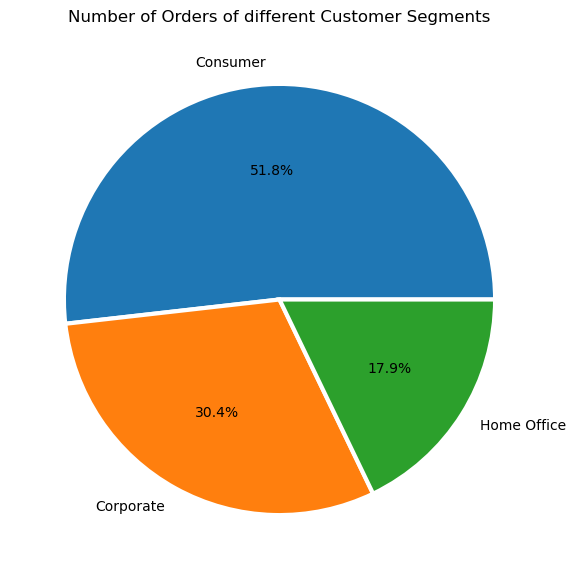

In [243]:
# PieChart - Customer Segments
data_customer_segment = df.groupby(['Customer Segment'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending=False)
print(data_customer_segment)

plt.figure(figsize=(12,7))
plt.pie(data_customer_segment["Number of Orders"], labels=data_customer_segment["Customer Segment"], autopct="%.1f%%", wedgeprops={"linewidth": 3.0, "edgecolor": "white"});
plt.title("Number of Orders of different Customer Segments");
plt.show()

***Observations:*** Maxumum numbers of customer is Individual customer. Which is approximately 52%

## Which category generates the most profit?

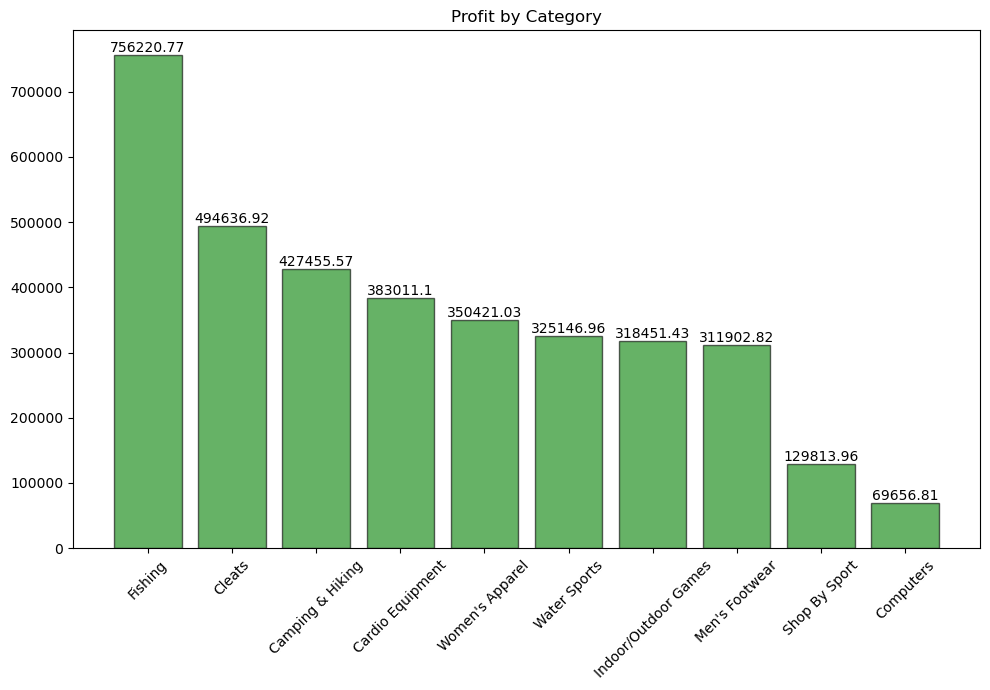

In [112]:
p2 = df.groupby('Category Name')['Benefit per order'].sum().sort_values(ascending = False).head(10)

plt.figure(figsize=(10,7))
plt.bar(p2.index, p2, fc='green', ec='black', alpha = 0.6)
plt.title('Profit by Category')
for i in range (len(p2)) :
    plt.text(i, p2[i], round(p2[i], 2), ha='center', va='bottom')
    
plt.xticks(rotation=45)
plt.tight_layout()

***Observations:*** ***Fishing*** is the most profitable category.

## Is there any relation between Sales & Product Price?

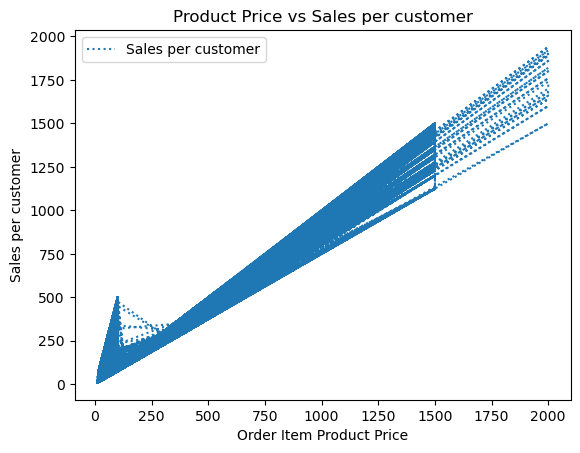

In [121]:
df.plot(x='Order Item Product Price', y='Sales per customer', linestyle='dotted', markerfacecolor='blue', markersize=12) 
plt.title('Product Price vs Sales per customer')
plt.xlabel('Order Item Product Price')
plt.ylabel('Sales per customer')
plt.show()

***Observations:*** Above the graph it observed that prices has linear relation with sales

## Every year what average sales in each month is?

In [38]:
df["Year"] = df["order date (DateOrders)"].dt.year
df["Month"] = df["order date (DateOrders)"].dt.month
df.head()

pivot_data = df.pivot_table(values="Sales", index="Month", columns="Year")
pivot_data

Year,2015,2016,2017,2018
Month,,,,
1,197.593025,196.785452,197.373590,156.217671
2,196.026623,197.904138,202.310416,NaN
3,196.056265,196.900791,195.998650,NaN
4,197.905439,196.431544,199.217502,NaN
5,196.094538,194.153188,207.915238,NaN
6,199.455818,198.468451,208.460208,NaN
7,195.901338,197.118873,207.667048,NaN
8,195.238894,196.512983,209.111625,NaN
9,198.120350,194.262992,220.423031,NaN


## Which quarter recorded highest sales?
To better observe the trend, it can be found by dividing time into years, months, weeks, and hour

In [131]:
df['order_year']= df["order date (DateOrders)"].dt.year
df['order_month'] = df["order date (DateOrders)"].dt.month
df['order_week_day'] = df["order date (DateOrders)"].dt.weekday # Start from Monday
df['order_hour'] = df["order date (DateOrders)"].dt.hour
df['order_month_year'] = df["order date (DateOrders)"].dt.to_period('M')


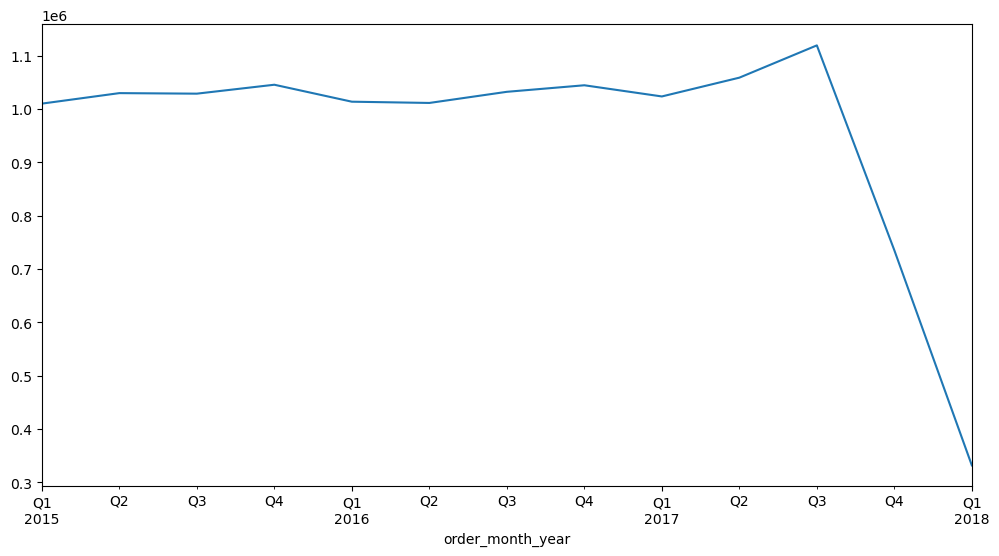

In [126]:
quater = df.groupby('order_month_year')
quartersales = quater['Sales'].sum().resample('Q').mean().plot(figsize=(12,6))

***Obseervvations:*** From the above graph it seen that sales are consistent from Q1(1st quarter) of 2015 until Q3(3rd quarter) of 2017 and suddenly dipped by Q1(1st quarter) of 2018

## What is the average sells in years, month, weeks and hours?

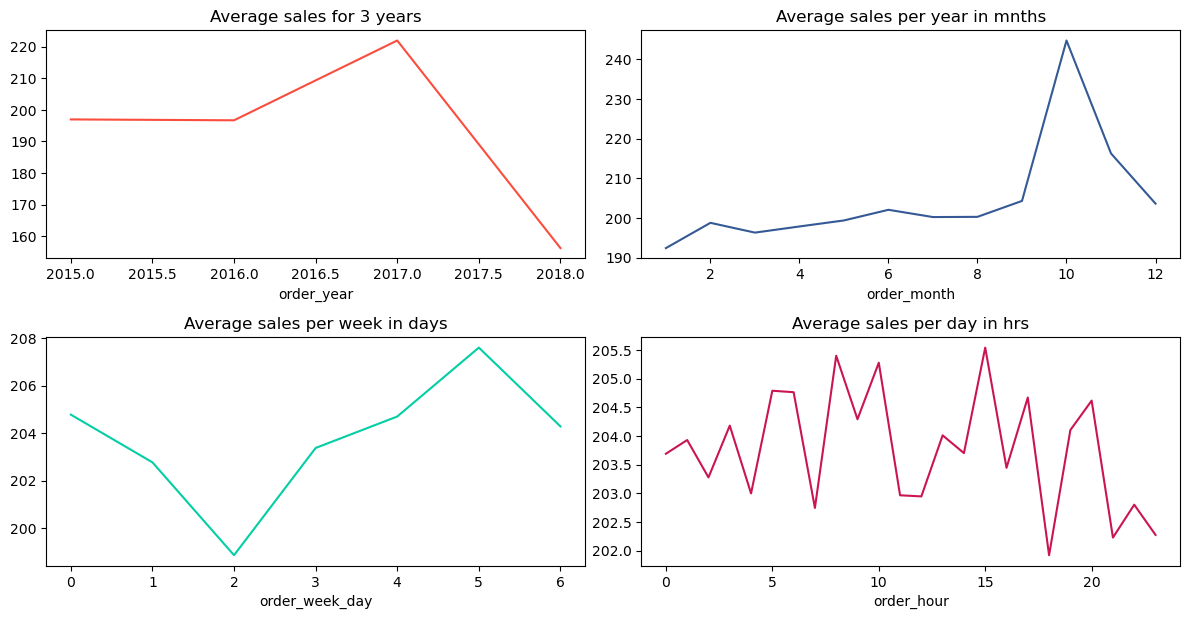

In [173]:
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1) #row, column, index
quater = df.groupby('order_year')
quater['Sales'].mean().plot(figsize=(12,12),title='Average sales for 3 years',color="#fb4d3d")

plt.subplot(4, 2, 2) #row, column, index
mnth = df.groupby("order_month")
mnth['Sales'].mean().plot(figsize=(12,12),title='Average sales per year in mnths',color="#345995")

plt.subplot(4, 2, 3) #row, column, index
days = df.groupby("order_week_day")
days['Sales'].mean().plot(figsize=(12,12),title='Average sales per week in days',color="#03cea4")

plt.subplot(4, 2, 4) #row, column, index
hrs = df.groupby("order_hour")
hrs['Sales'].mean().plot(figsize=(12,12),title='Average sales per day in hrs',color="#ca1551")
plt.tight_layout()
plt.show()

***Observations:*** 
- In 2017 there was heightest numbers of orders are placed by customers.
- In **Saturday** recorded highest number of average sales and **wednesday** with the least number of sales.
- In **October** the most number of orders came followed by November.
- Daily average sales remain constant regardless of time.

## Which payment methods  customer prefer most?

In [133]:
data_payment_preference = df.groupby(['Type'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending=False)
print(data_payment_preference)

       Type  Number of Orders
1     DEBIT             69295
3  TRANSFER             49883
2   PAYMENT             41725
0      CASH             19616


***Observations:*** Debit card payment customers like most.

## Which payment method is preferred the most by people in different regions?

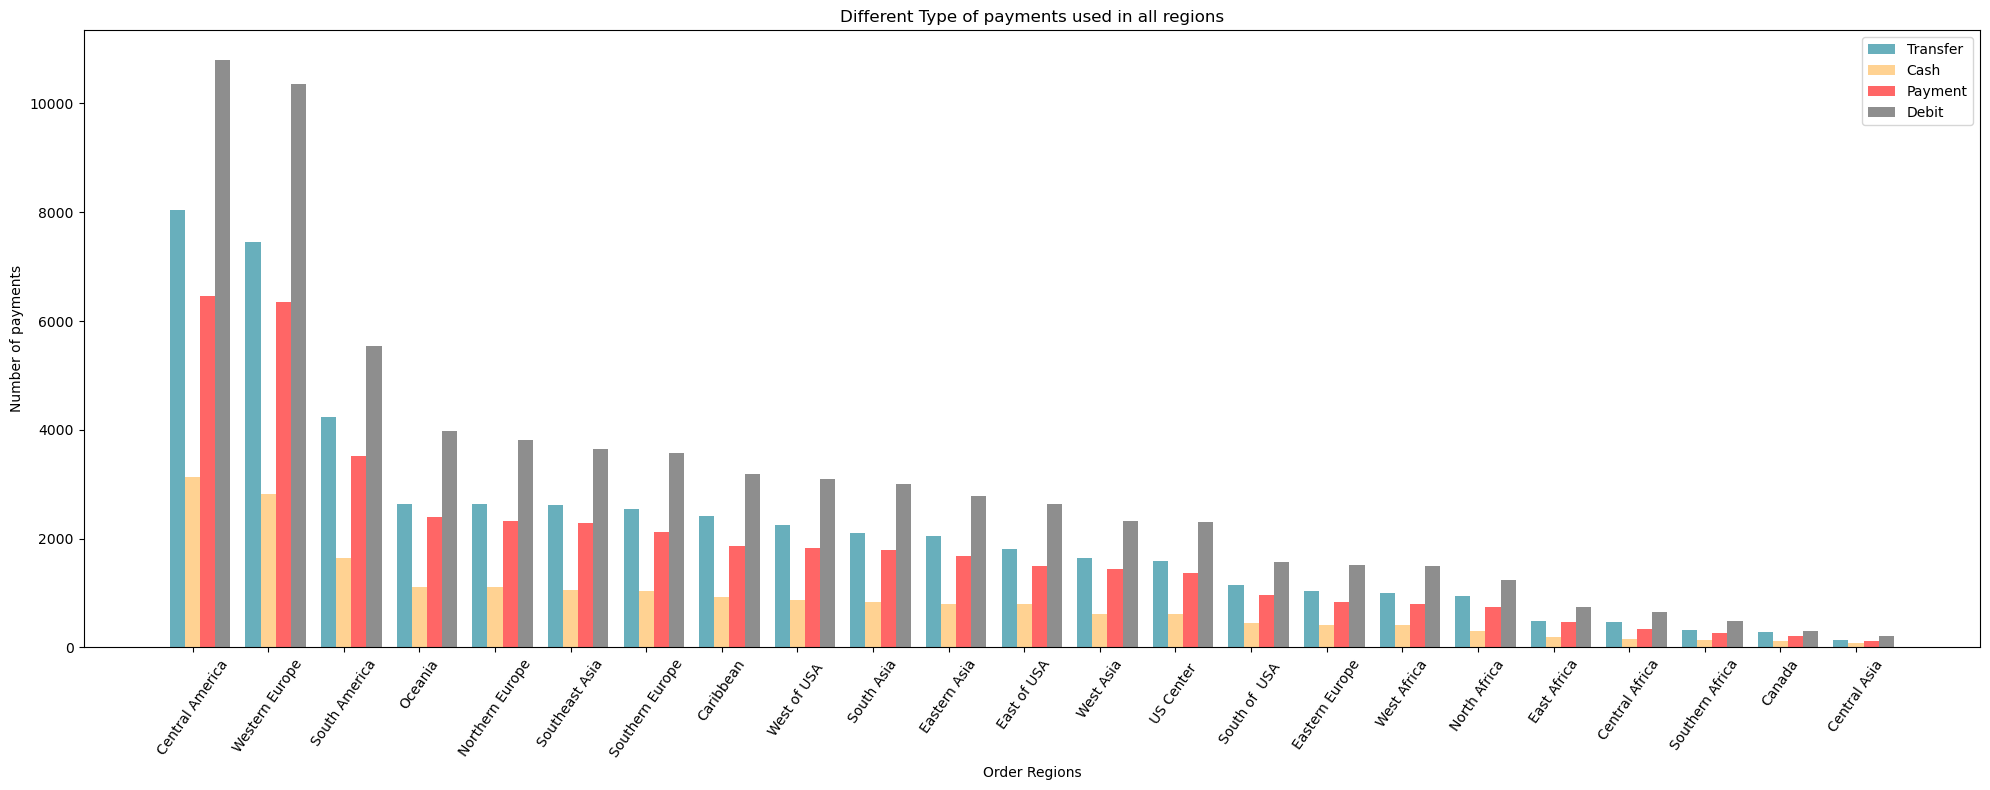

In [167]:
count1 = df[(df['Type'] == 'TRANSFER')]['Order Region'].value_counts() # Total numbers of orders in TRANSFER payment type in different region
count2 = df[(df['Type'] == 'CASH')]['Order Region'].value_counts() # Total numbers of orders in CASH payment type in different region
count3 = df[(df['Type'] == 'PAYMENT')]['Order Region'].value_counts() # Total numbers of orders in PAYMENT payment type in different region
count4 = df[(df['Type'] == 'DEBIT')]['Order Region'].value_counts() # Total numbers of orders in DEBIT payment type in different region
names = df['Order Region'].value_counts().keys() # Regions name


n_groups = 23 # Show 23 result
fig,ax = plt.subplots(figsize=(20,8))
index = np.arange(n_groups)

bar_width=0.2
opacity=0.6

type1 = plt.bar(index, count1, bar_width, alpha=opacity, color='#037A90', label='Transfer') # x, y, opacity, color,label 
type2 = plt.bar(index+bar_width, count2, bar_width, alpha=opacity, color='#FFB449', label='Cash')
type3 = plt.bar(index+bar_width+bar_width, count3, bar_width, alpha=opacity, color='#F00', label='Payment')
type4 = plt.bar(index+bar_width+bar_width+bar_width, count4, bar_width, alpha=opacity, color='#434343', label='Debit')

plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Different Type of payments used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=55)
plt.tight_layout()
plt.show()

***Observations:*** 
- **Debit** type is most preferred by customer in all regions.
- **Cash** payment being the least preferred method by customers.

## Check the frequency respect to Payment Type & Order Status

In [254]:
# Crosstabs - Categorical to Categorical variable
cross_tab_prop = pd.crosstab(index=df['Type'], columns = df['Order Status'], normalize = "index")
cross_tab_prop

Order Status,CANCELED,CLOSED,COMPLETE,ON_HOLD,PAYMENT_REVIEW,PENDING,PENDING_PAYMENT,PROCESSING,SUSPECTED_FRAUD
Type,,,,,,,,,
CASH,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DEBIT,0.000000,0.0,0.858518,0.141482,0.000000,0.000000,0.000000,0.000000,0.000000
PAYMENT,0.000000,0.0,0.000000,0.000000,0.045368,0.000000,0.954632,0.000000,0.000000
TRANSFER,0.074013,0.0,0.000000,0.000000,0.000000,0.405489,0.000000,0.439067,0.081431


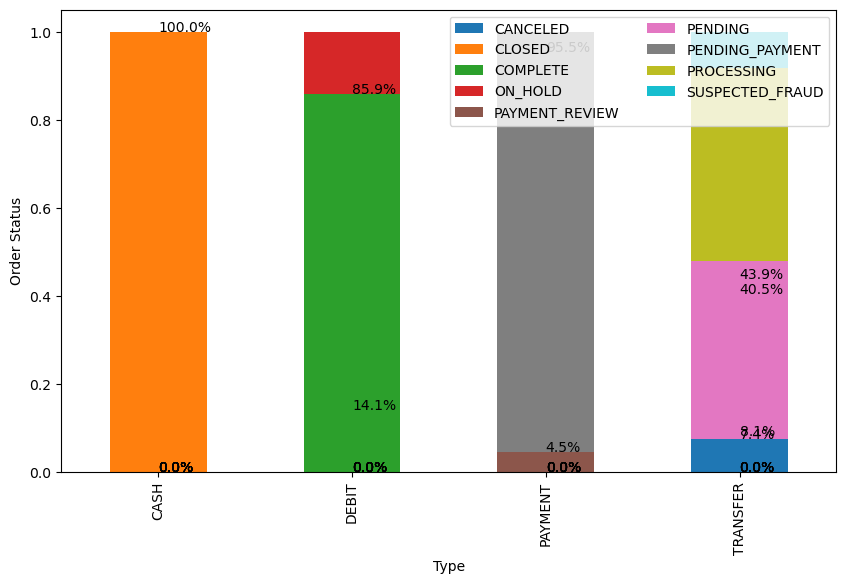

In [255]:
cross_tab_prop.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Type")
plt.ylabel("Order Status")
for n, x in enumerate([*cross_tab_prop.index.values]):
    for l in cross_tab_prop.loc[x]:
        plt.text(x=n, y=l, s=f'{np.round(l * 100, 1)}%', color="black")
plt.show()

***Observations:***
- On **Cash** there is high chance to be order closed. That mean successfully completed.
- Another important thing is that on **Transfer** payment method there is high chance of Suspected fraud.
- The height chance to cancelled order in **transfer** payment type.
- In Payment method there almost 96% order are on **Pending Payment**, that means it takes time to receive the payment

## Check whether there is any relation between Discount & Sales

<AxesSubplot:xlabel='Sales', ylabel='Order Item Discount'>

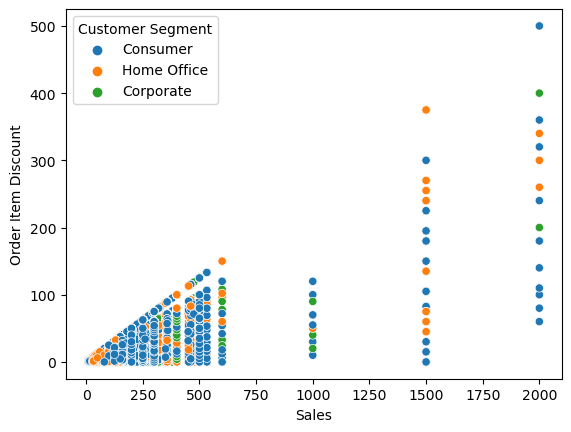

In [256]:
# Scatterplot - Numerical to Numerical
sns.scatterplot(data=df, x="Sales", y="Order Item Discount", hue="Customer Segment")

***Observations:*** It is positive correlation, So, we can conclude that as Discount increased the sales also increased

Some products have negative benefit per order, which indicating that the orders are lose in the business.

In [186]:
loss = df[(df['Benefit per order']<0)] # taking values which are less than 0
print('Total revenue lost with orders', loss['Benefit per order'].sum())

Total revenue lost with orders -3883547.345768667


***Observations:*** Huge amount of loss are happened which are approximately 3.9 Millions.

## Which category products made most loss?

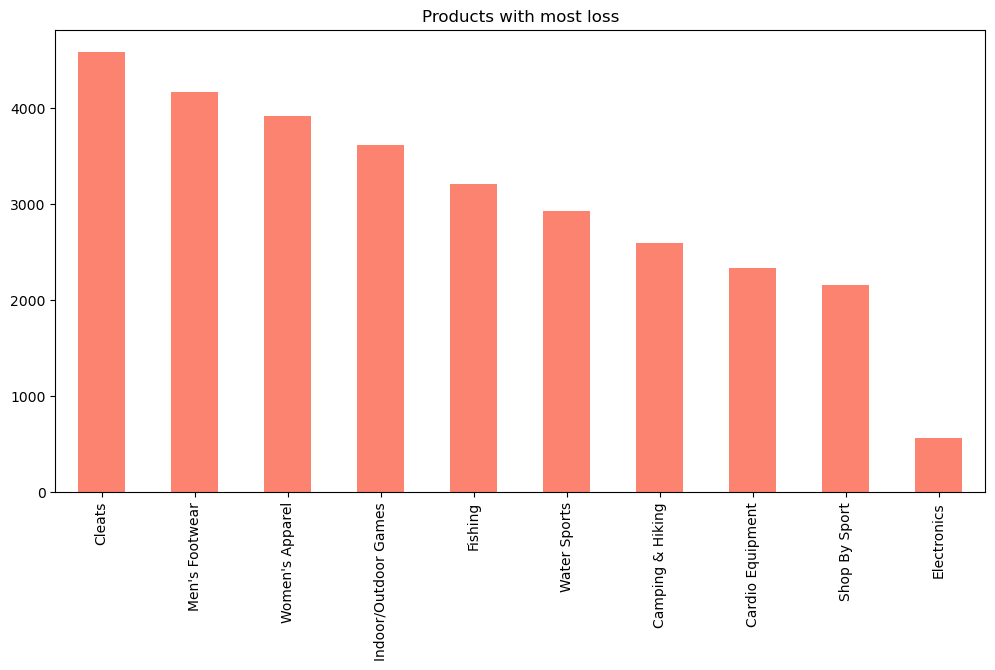

In [336]:
# Plotting top 10 category with most loss
x = loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(12,6), title="Products with most loss", color="#fc8370")

***Observations:*** From the graph we can say **Cleats** category made heighest loss.

## Which region made most loss?

<AxesSubplot:title={'center':'Regions with most loss'}>

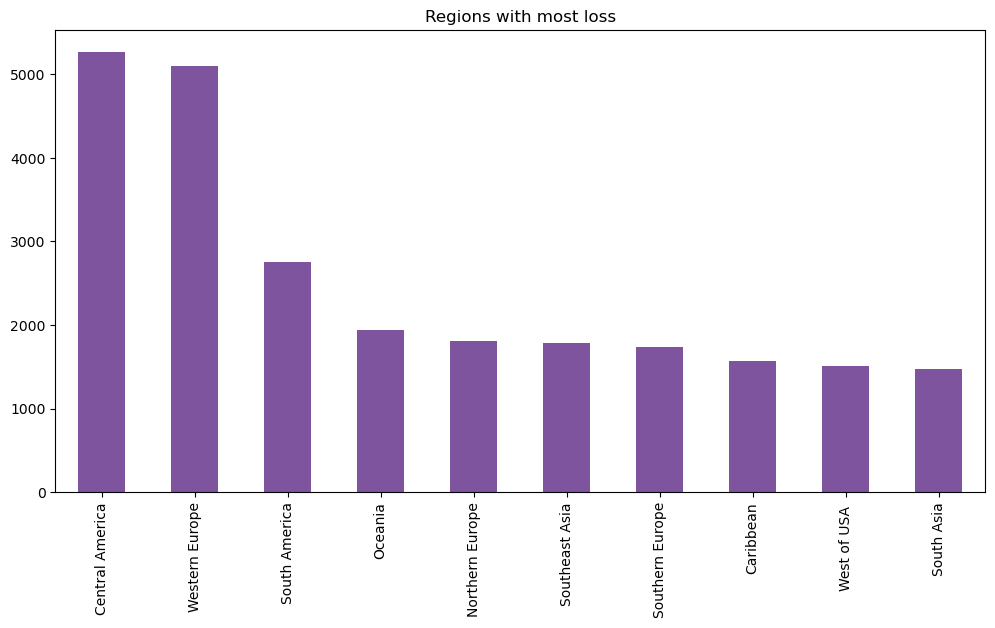

In [185]:
# Plotting top 10 regions
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(12,6), title="Regions with most loss", color="#7e549e")

***Observations:*** From the above graph it clear that order from **Central America** resgion made most loss

It's possible that either suspected fraud or late deliveries caused these lost sales. It can be useful to prevent fraud in the future to identify the fraudulent payment method.

In [192]:
data_fraud_num = df[df['Order Status'] == 'SUSPECTED_FRAUD'].groupby(['Type'])['Order Status'].count().reset_index(name='Number of Fraud').sort_values(by= 'Number of Fraud', ascending=False)
print(data_fraud_num)

       Type  Number of Fraud
0  TRANSFER             4062


***Observations:*** We can clearly see that there are no frauds conducted with DEBIT,CASH,PAYMENT methods. All the suspected fraud orders are made using **Transfer** payment method.

## Which region being suspected to the fraud the most?

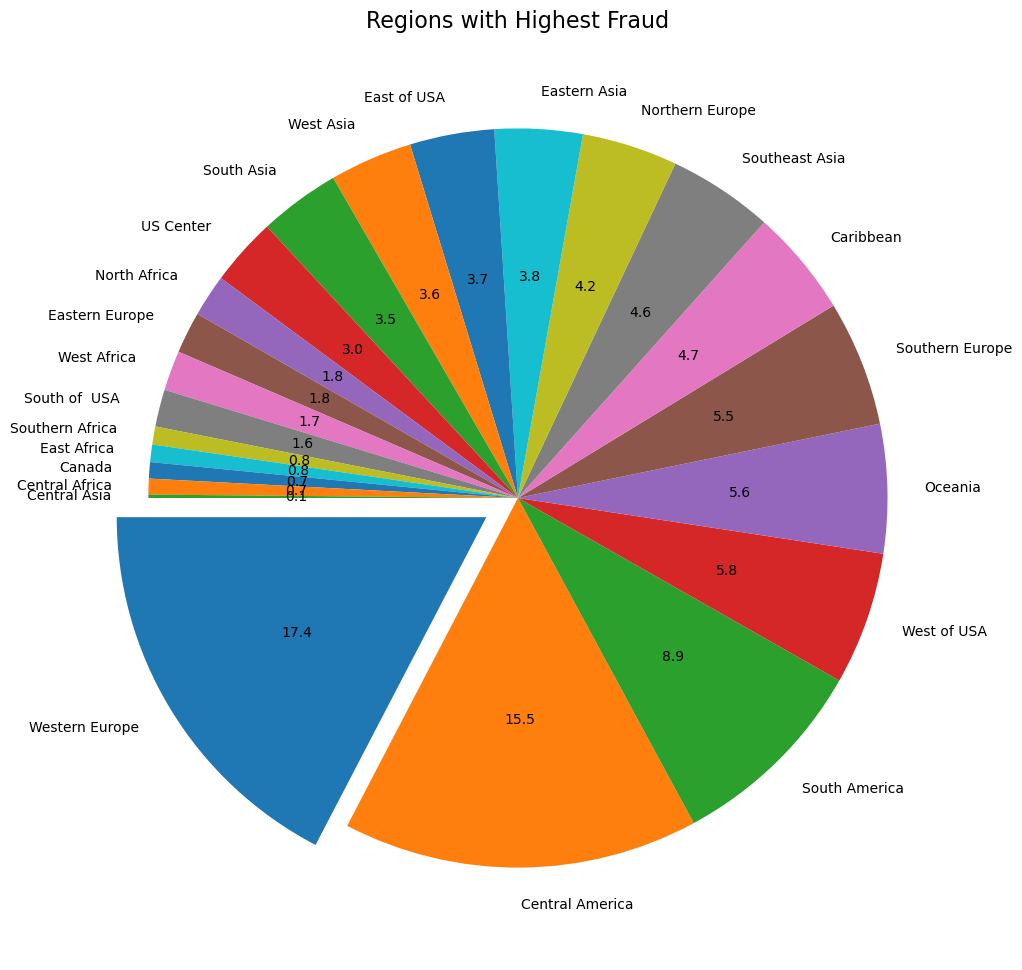

In [211]:
fraud_orders = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')] # separating orders with suspected fraud

# Plotting pie chart with respect to order region
fraud = fraud_orders['Order Region'].value_counts().plot.pie(figsize=(24,12), startangle=180, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0), autopct='%.1f', shadow=False)
plt.title("Regions with Highest Fraud",size=16) # Plotting title
plt.ylabel("")
plt.show()

***Observations:*** It is evident that **Western Europe** accounts for approximately 17.4 percent of all orders suspected of fraud, followed by **Central America** with 15.5%

## Which product is most frequently thought to be fraudulent in Western Europe?

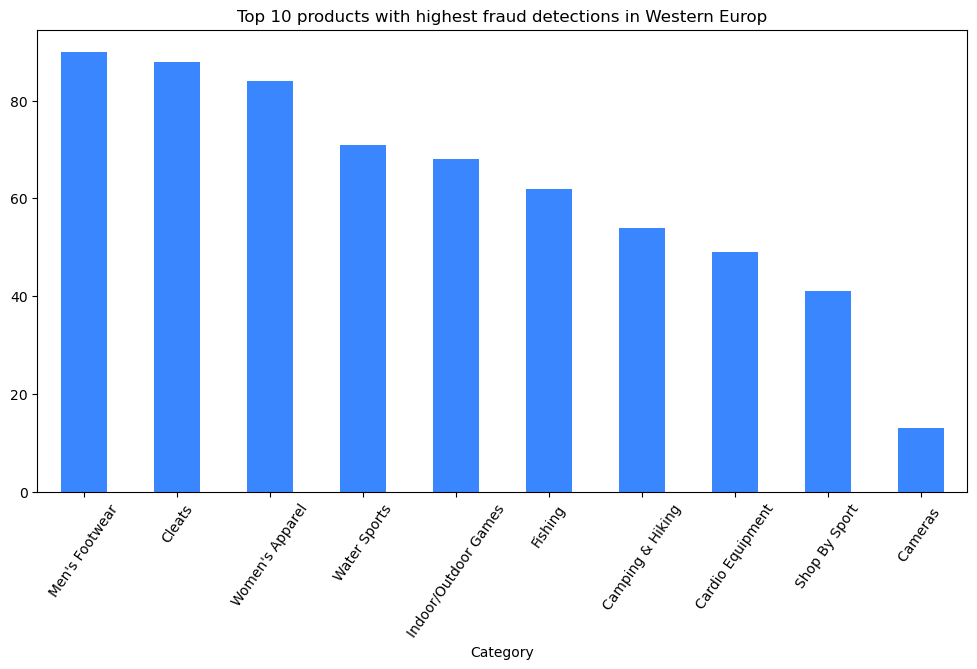

In [225]:
# Plotting bar chart for top 10 most suspected fraud department in Western Europe
df[(df['Order Status'] == 'SUSPECTED_FRAUD') &(df['Order Region'] == 'Western Europe')]['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(12,6), title="Fraud product in Western Europe", color='#3a86ff')
plt.title("Top 10 products with highest fraud detections in Western Europ")
plt.xlabel("Category")
plt.xticks(rotation=55)
plt.show()

***Observations:*** We can see that **cleats** department is being suspected to fraud the most followed by **Men's footwear** in Western Europe.

Let's detect which customers are conducting all these fraud.

# Which customers are conducting all these fraud?

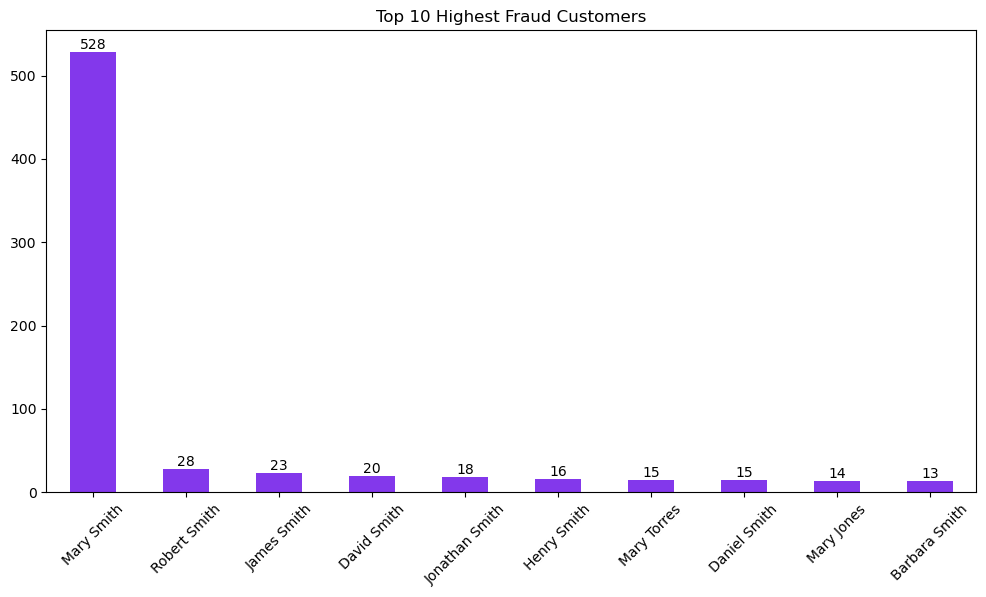

In [236]:
frud_customer = df[(df['Order Status'] == 'SUSPECTED_FRAUD')] 
# Top 10 customers with most fraud
ax = frud_customer['Customer Name'].value_counts().nlargest(10).plot.bar(figsize=(12,6), title="Top 10 Highest Fraud Customers", color="#8338eb")

for container in ax.containers:
    ax.bar_label(container) # showing values on bar
    
plt.xticks(rotation=45)
plt.show()

***Observations:*** It is surprising that customer naamed ***Mary Smith** alone was responible for trying to conduct 528 times fraud.

Delivering products to customers on time is an important aspect for a supply chain company because customers will not be satisfied if products are not delivered on time.

## Which category of products are being delivered the most late?

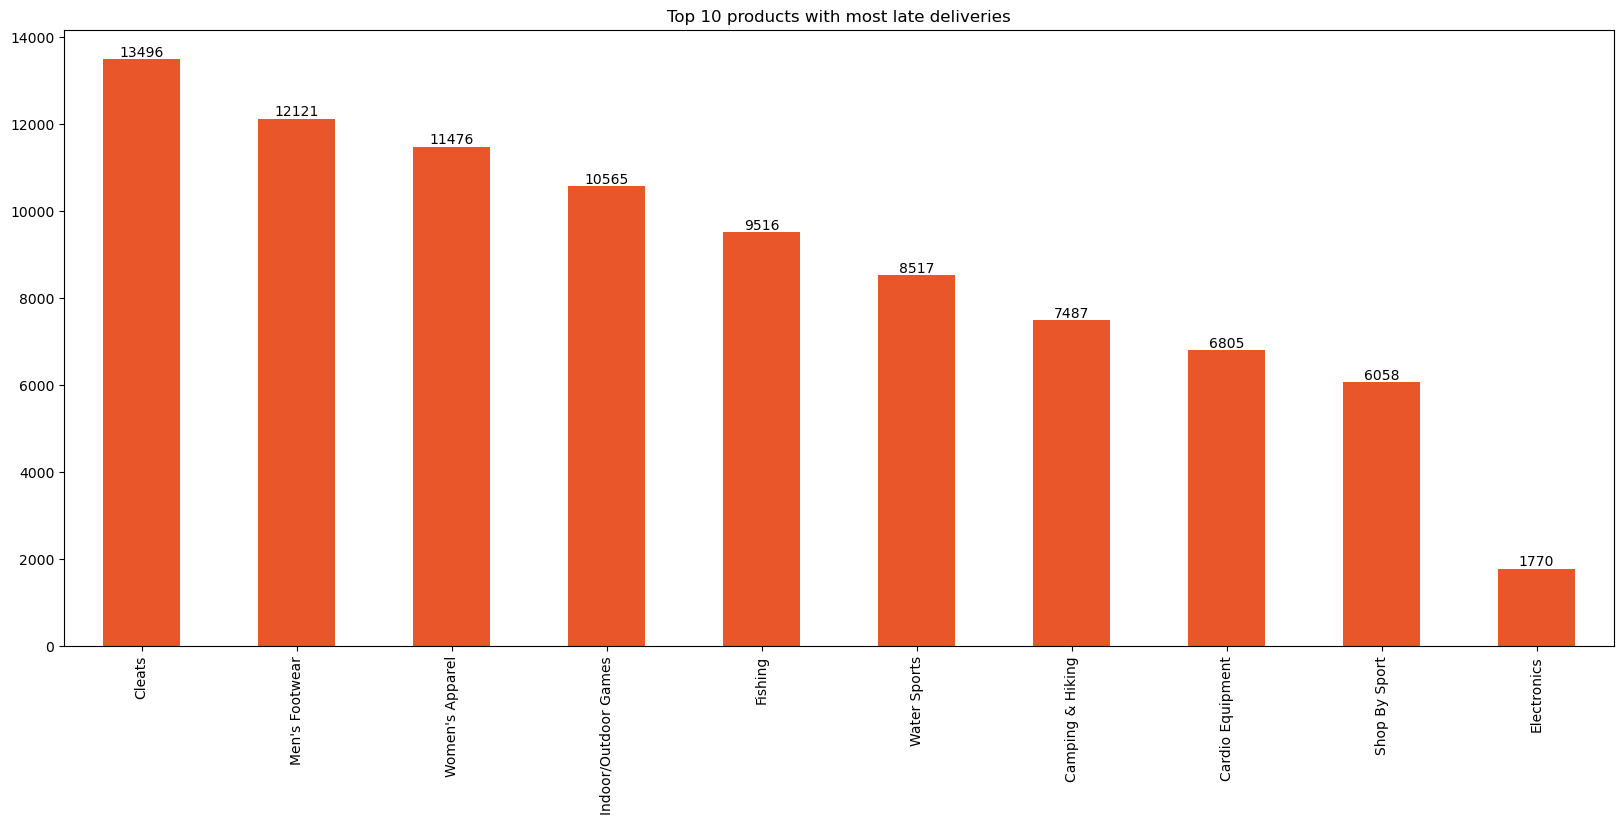

In [248]:
late_delivery = df[(df['Delivery Status'] == 'Late delivery')]

# Top 10 products with most late deliveries
ax = late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 products with most late deliveries", color="#e9562a")

for container in ax.containers:
    ax.bar_label(container) # showing values on bar

***Observations:*** It can be seen that orders with **Cleats** department is getting delayed the most followed by **Men's Footwear**.

# Late deliveried orders for different types of shipment method in all regions

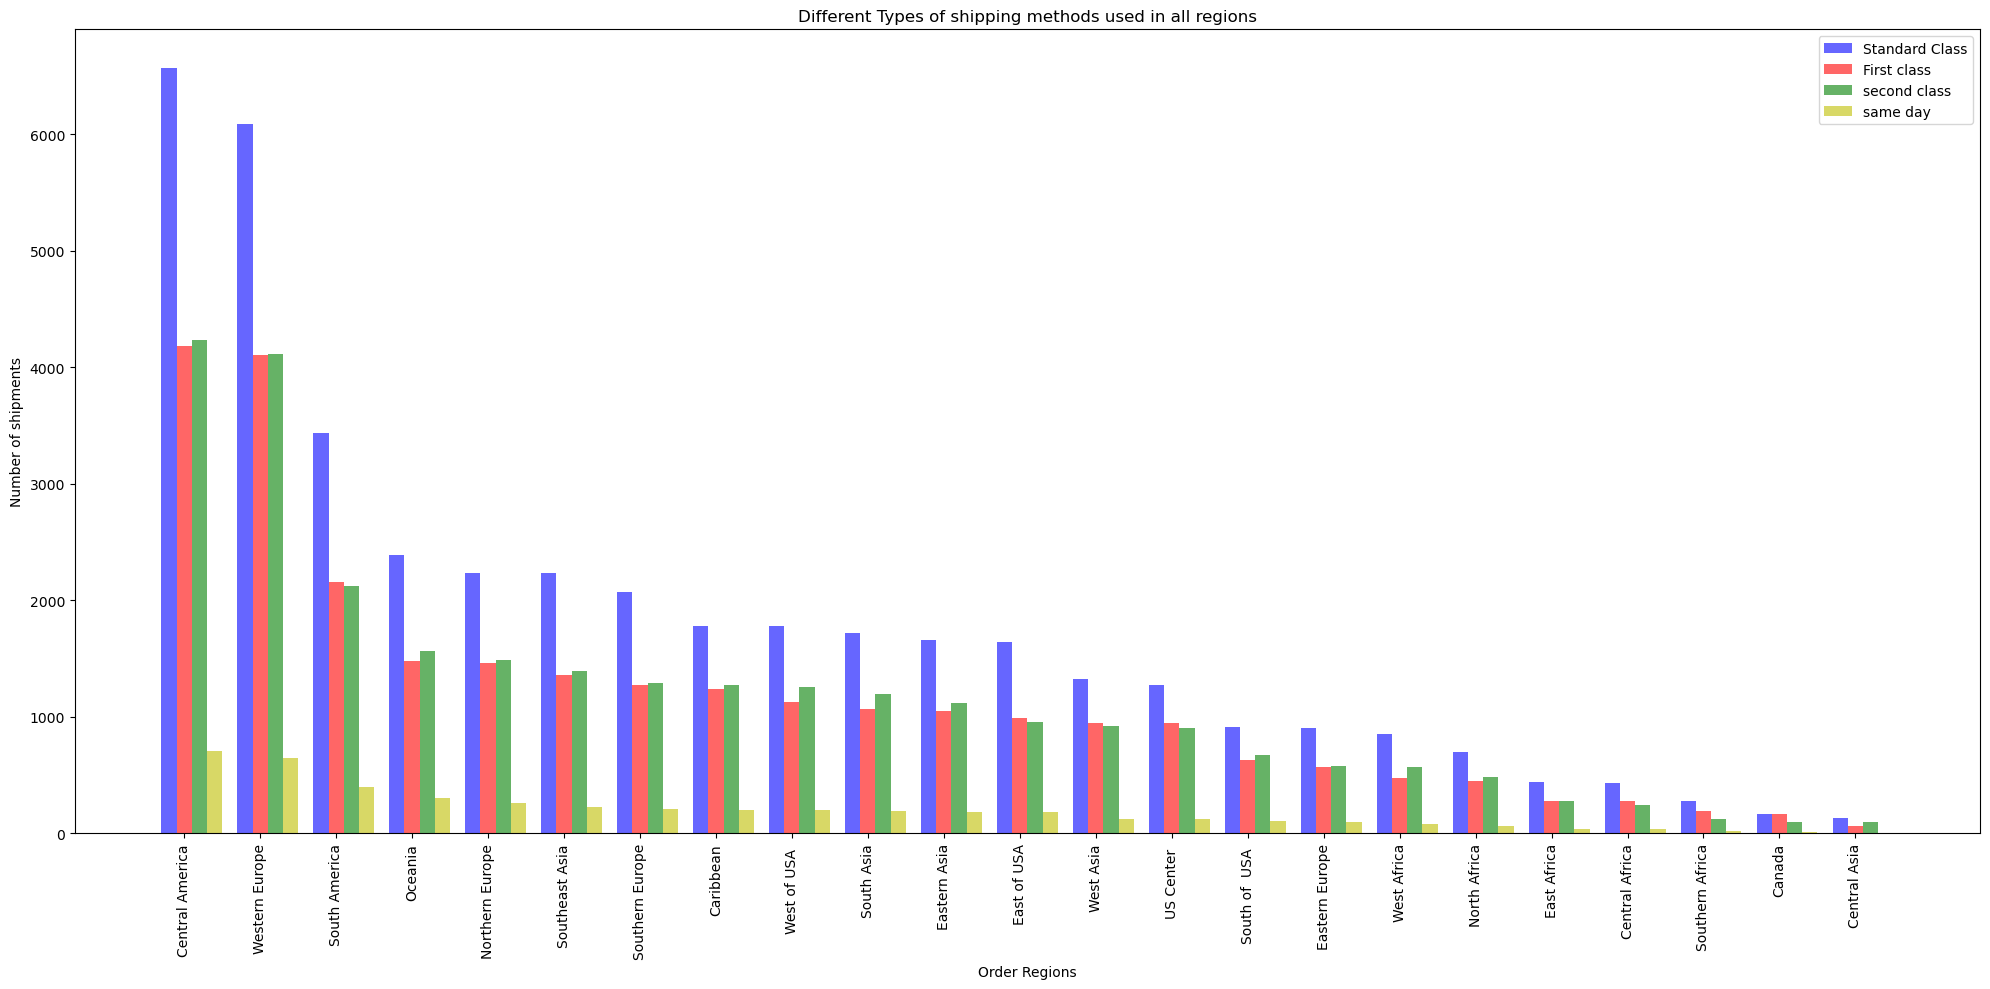

In [252]:
# Counting total values
count1 = df[(df['Delivery Status'] == 'Late delivery') & (df['Shipping Mode'] == 'Standard Class')]['Order Region'].value_counts()
count2 = df[(df['Delivery Status'] == 'Late delivery') & (df['Shipping Mode'] == 'First Class')]['Order Region'].value_counts()
count3 = df[(df['Delivery Status'] == 'Late delivery') & (df['Shipping Mode'] == 'Second Class')]['Order Region'].value_counts()
count4 = df[(df['Delivery Status'] == 'Late delivery') & (df['Shipping Mode'] == 'Same Day')]['Order Region'].value_counts()

# Index names
names = df['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,10))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.6
type1 = plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Standard Class')
type2 = plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='First class')
type3 = plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='second class')
type4 = plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='same day')

plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Different Types of shipping methods used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

***Observations:*** 

- The most number of late deliveries for all regions occured with **standard** class shipping.
- In **same day** shipping being the one with least number of late deliveries.
- Both the **first class** and **second class** shipping have almost equal number of late deliveries.

In [35]:
data_cus_order = df.groupby(['Customer Segment'])['Order Id'].count().reset_index(name='Numbers of Order').sort_values(by='Numbers of Order', ascending=False)
data_cus_sales = df.groupby(['Customer Segment'])['Sales'].sum().reset_index(name='Sum of Sales').sort_values(by='Sum of Sales', ascending=False)

df2 = data_cus_order.merge(data_cus_sales, on="Customer Segment")
df2["Avg Sale"] = (df2["Sum of Sales"]/df2["Numbers of Order"])
print(df2)

  Customer Segment  Numbers of Order  Sum of Sales    Avg Sale
0         Consumer             93504  1.909579e+07  204.224313
1        Corporate             54789  1.116841e+07  203.843962
2      Home Office             32226  6.520538e+06  202.337802


***Observations:*** Individual customers avg purchase rate is higher

## Histplot for all columns exclude object columns type

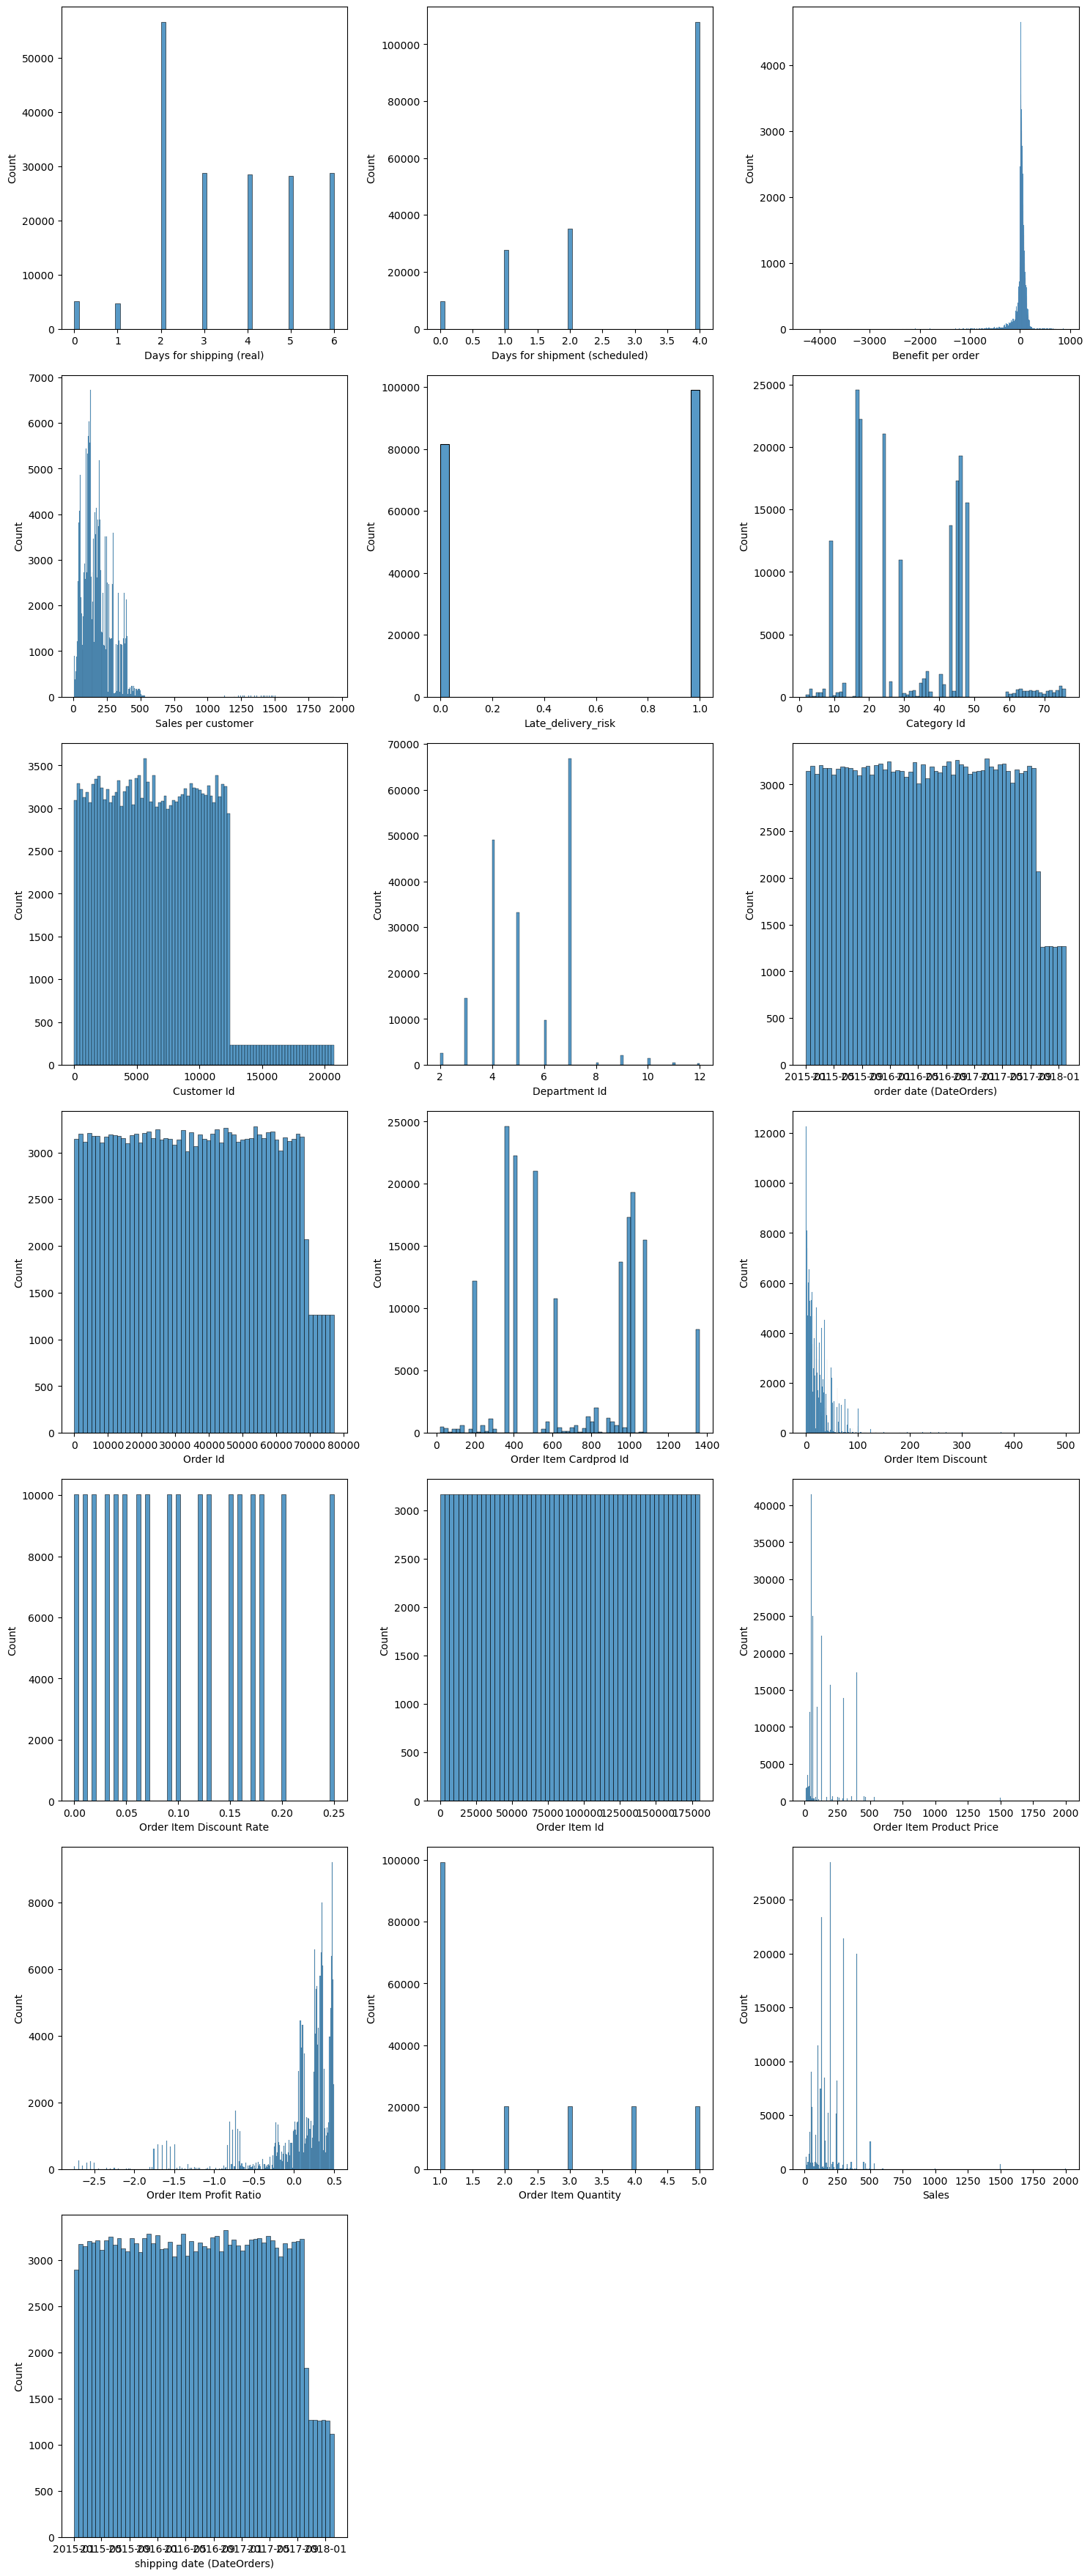

In [37]:
cols = 3
rows = 15
num_cols = df.select_dtypes(exclude="object").columns

fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    try:
        ax=fig.add_subplot(rows,cols,i+1)
        sns.histplot(x = df[col], ax = ax)
    except ValueError:
        continue
fig.tight_layout()  
plt.show()

***Observations:***
* The schedules delivery date 4 is higher
* The most of the order delivered within 2 days
* Most of the order have 0 benifits
* Most of the customer purchase amount is approx 125
* Most of the customer oder only 1 product

## Understanding Customer Needs

Understanding customer needs and targeting specific clusters of customers based on their needs, is one way for a supply chain company to increase the number of customers and generate more profits. Since the purchase history of customers is already available in the dataset, it can be used RFM(Recency, Frequency, and Monetary) analysis for customer segmentation. Because it uses numerical values to show customer novelty, frequency and financial values, and the output results are easy to interpret.

In [257]:
import datetime as dt

# Calculating total price for which each order
df['TotalPrice'] = df['Order Item Quantity'] * df['Sales'] # Multiplying item price * Order quantity

df['order date (DateOrders)'].max() # Calculating when the last order come to check recency

#Present date was set to next day of the last order. i.e,2018-02-01
present = dt.datetime(2018,2,1)
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

Customer_seg = df.groupby('Customer Id').agg({'order date (DateOrders)': lambda x: (present - x.max()).days, 'Order Id': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
# Changing order dates to int format
Customer_seg['order date (DateOrders)'] = Customer_seg['order date (DateOrders)'].astype(int)
# Renaming columns as R_Value, F_Value, M_Value
Customer_seg.rename(columns={'order date (DateOrders)': 'R_Value', 'Order Id': 'F_Value', 'TotalPrice': 'M_Value'}, inplace=True)
Customer_seg.head()

,R_Value,F_Value,M_Value
Customer Id,,,
1,792,1,2499.750061
2,136,10,3239.310028
3,229,18,6777.200182
4,380,14,5078.870088
5,457,7,3394.150024


- R_Value(Recency) indicates how much time elapsed since a customer last order.
- F_Value(Frequency) indicates how many times a customer ordered.
- M_Value(Monetary value) tells us how much a customer has spent purchasing items

Let's plot on graph

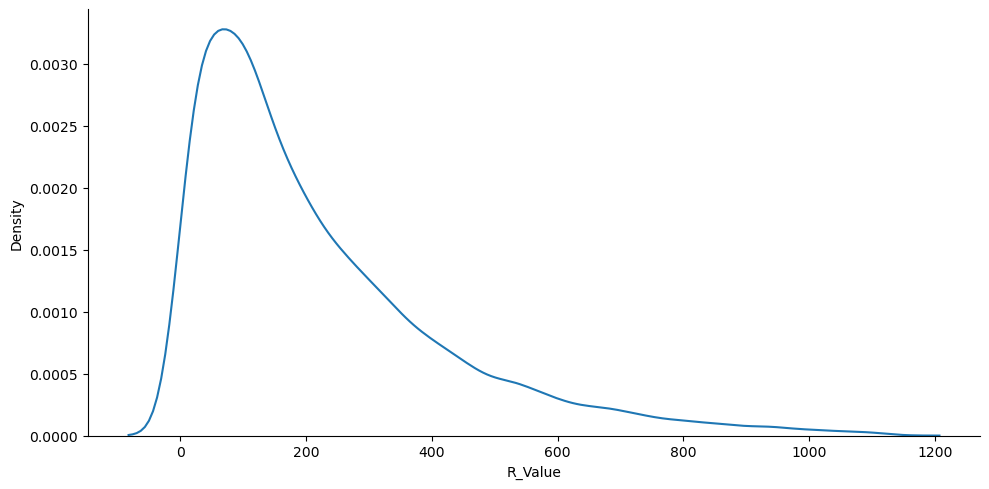

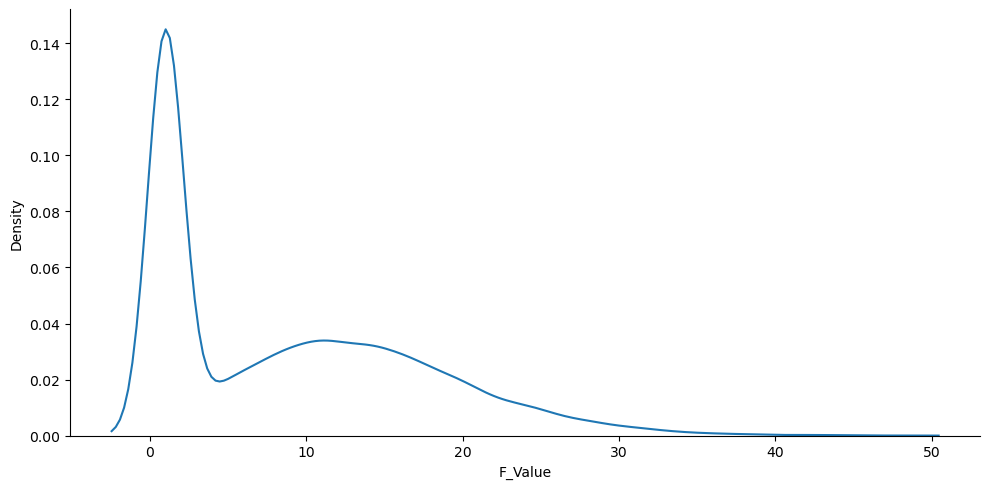

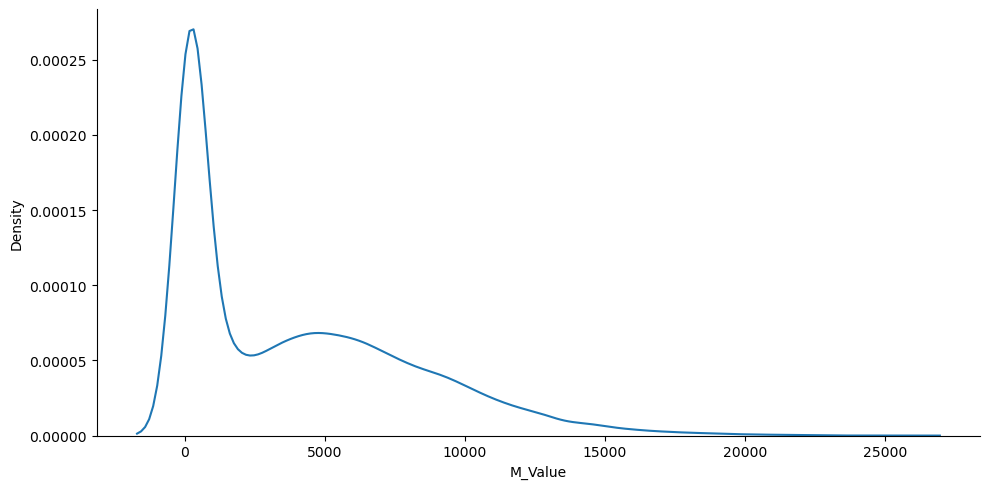

In [286]:
sns.displot(data=Customer_seg, x="R_Value", kind="kde", aspect=2) #Plot distribution of R_Value
sns.displot(data=Customer_seg, x='F_Value', kind="kde", aspect=2) #Plot distribution of F_Value
sns.displot(data=Customer_seg, x='M_Value', kind="kde", aspect=2) #Plot distribution of M_Value

# Hypothesis Testing

Null Hypothesis H0:

- The region to which the shipment is made does not influence late delivery
- The type of shipment does not influence late delivery
- The category of the product does not influence the late delivery

Alternative Hypothesis Ha:

- The region to which the shipment is made influences the late delivery
- The type of shipment influences late delivery
- Product category influences late delivery

In [52]:
def calculate_chi2(dependiente,independientes):
    for var in independientes:
        primary_location_cross = pd.crosstab(df[dependiente], df[var])
        g, p, dof, expctd = chi2_contingency(primary_location_cross)
        print("p-value of Chi-square test for " + dependiente + " vs " + var + " = " , p)

columns = ['Order Region','Shipping Mode','Category Name','Type','Customer City']
calculate_chi2('Delivery Status', columns)

p-value of Chi-square test for Delivery Status vs Order Region =  3.912852929033907e-23
p-value of Chi-square test for Delivery Status vs Shipping Mode =  0.0
p-value of Chi-square test for Delivery Status vs Category Name =  0.6712499177801518
p-value of Chi-square test for Delivery Status vs Type =  0.0
p-value of Chi-square test for Delivery Status vs Customer City =  0.0


Based on the previous hypothesis test in which the Chi2 distribution is used and the levels of significance between the different categorical variables were calculated, the following can be concluded:

- Reject null hypothesis 1
- Reject null hypothesis 2
- Accept the null hypothesis 3

# CLASSIFICATION algorithms
### The first algorithm to use is logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [55]:
# Select the columns needed for the model
prediction_data = df[['Order Region','Shipping Mode','Delivery Status']]
prediction_data.columns = ['Order_Region','Shipping_Mode','Delivery_Status'] #by including the Type column the model lowers its precision, by including Customer City the model does not converge
prediction_data = prediction_data[prediction_data.Delivery_Status!='Shipping canceled']
prediction_data = prediction_data[prediction_data.Delivery_Status!='Advance shipping']
prediction_data.head()

,Order_Region,Shipping_Mode,Delivery_Status
1,South Asia,Standard Class,Late delivery
2,South Asia,Standard Class,Shipping on time
6,Eastern Asia,First Class,Late delivery
7,Eastern Asia,First Class,Late delivery
8,Eastern Asia,Second Class,Late delivery


In [56]:
# Feature enginering, one hot encoding
# use one hot encoding when the categorical variable is NOMINAL
prediction_data = pd.get_dummies(prediction_data, drop_first=True)
prediction_data.head()

,Order_Region_Caribbean,Order_Region_Central Africa,Order_Region_Central America,Order_Region_Central Asia,Order_Region_East Africa,Order_Region_East of USA,Order_Region_Eastern Asia,Order_Region_Eastern Europe,Order_Region_North Africa,Order_Region_Northern Europe,Order_Region_Oceania,Order_Region_South America,Order_Region_South Asia,Order_Region_South of USA,Order_Region_Southeast Asia,Order_Region_Southern Africa,Order_Region_Southern Europe,Order_Region_US Center,Order_Region_West Africa,Order_Region_West Asia,Order_Region_West of USA,Order_Region_Western Europe,Shipping_Mode_Same Day,Shipping_Mode_Second Class,Shipping_Mode_Standard Class,Delivery_Status_Shipping on time
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [57]:
# Test train split
X_train, X_test, Y_train, Y_test = train_test_split(prediction_data.drop('Delivery_Status_Shipping on time',axis=1),prediction_data['Delivery_Status_Shipping on time'])

In [58]:
# Train the model
LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)

LogisticRegression()

In [59]:
# Score the model
LogReg.score(X_test, Y_test)

0.7557175093004818

In [60]:
Y_pred = LogReg.predict(X_test)
print (classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85     24650
           1       0.53      0.14      0.23      8144

    accuracy                           0.76     32794
   macro avg       0.65      0.55      0.54     32794
weighted avg       0.71      0.76      0.70     32794



***Observations:*** The model created using logistic regression has a 75.59% accuracy.

### The second algorithm to use is Random Forest

In [61]:
# Import dependencies and train the model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [63]:
# Score the model
classifier.score(X_test,Y_test)

0.7556260291516741

In [64]:
Y_pred_RF=classifier.predict(X_test)
print(classification_report(Y_test,Y_pred_RF))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86     24650
           1       0.56      0.07      0.13      8144

    accuracy                           0.76     32794
   macro avg       0.66      0.53      0.49     32794
weighted avg       0.71      0.76      0.68     32794



***Observations:*** The model created using the Random Forest algorithm has a 75.76% accuracy